# Machine Learning Intermedio

## Introduzione
Si usa il **machine learning** per:
- affrontare i tipi di dati spesso presenti nei dataset del mondo reale (valori mancanti, variabili categoriali),
- progettare pipeline per migliorare la qualità del codice di apprendimento automatico,
- utilizzare tecniche avanzate per la validazione dei modelli (cross-validation),
- costruire modelli all'avanguardia che sono ampiamente utilizzati per vincere le competizioni Kaggle (XGBoost) e
- evitare errori comuni e importanti nella scienza dei dati (leakage).

Gli esercizi pratici utilizzano i dati della Housing Prices Competition per gli utenti di Kaggle Learn, dove dovrete utilizzare 79 diverse variabili esplicative (come il tipo di tetto, il numero di camere da letto e il numero di bagni) per prevedere i prezzi delle case. Potrete misurare i vostri progressi inviando le previsioni a questa competizione e vedendo la vostra posizione in classifica.

## Esercizio

In [2]:
# Set up code checking
import os
if not os.path.exists("D:/Users/Alessio/OneDrive/Python/Kaggle/Intermediate Machine Learning/train.csv"):
    os.symlink("D:/Users/Alessio/OneDrive/Python/Kaggle/Intermediate Machine Learning/train.csv")  
    os.symlink("D:/Users/Alessio/OneDrive/Python/Kaggle/Intermediate Machine Learning/test.csv")  
from learntools.core import binder
binder.bind(globals())
from learntools.ml_intermediate.ex1 import *
print("Setup Complete")

Setup Complete


Lavorerete con i dati della [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course) per prevedere i prezzi delle case in Iowa utilizzando 79 variabili esplicative che descrivono (quasi) ogni aspetto delle case.  

![Immagine del set di dati sulle abitazioni di Ames](https://i.imgur.com/lTJVG4e.png)

Eseguire la cella di codice successiva senza modifiche per caricare le caratteristiche di addestramento e di validazione in `X_train` e `X_valid`, insieme agli obiettivi di predizione in `y_train` e `y_valid`.  Le caratteristiche di prova sono caricate in `X_test`.  (Per rivedere le **caratteristiche** e gli **obiettivi di predizione**, consultare [questo breve tutorial] (https://www.kaggle.com/dansbecker/your-first-machine-learning-model).  Per saperne di più sulla **validazione** dei modelli, consultare [qui] (https://www.kaggle.com/dansbecker/model-validation).  In alternativa, se preferite consultare un corso completo per rivedere tutti questi argomenti, iniziate da [qui] (https://www.kaggle.com/learn/machine-learning).)_

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv("D:/Users/Alessio/OneDrive/Python/Kaggle/Intermediate Machine Learning/train.csv", index_col='Id')
X_test_full = pd.read_csv("D:/Users/Alessio/OneDrive/Python/Kaggle/Intermediate Machine Learning/test.csv", index_col='Id')

# Obtain target and predictors
y = X_full.SalePrice
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = X_full[features].copy()
X_test = X_test_full[features].copy()

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

Utilizzare la cella successiva per stampare le prime righe dei dati. È un modo piacevole per avere una panoramica dei dati che si utilizzeranno nel modello di previsione dei prezzi.

In [5]:
X_train.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
619,11694,2007,1828,0,2,3,9
871,6600,1962,894,0,1,2,5
93,13360,1921,964,0,1,2,5
818,13265,2002,1689,0,2,3,7
303,13704,2001,1541,0,2,3,6


La cella di codice successiva definisce cinque diversi modelli di foresta casuale. Eseguire questa cella di codice senza modifiche.

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

Per selezionare il modello migliore tra i cinque, definiamo la funzione `score_model()`. Questa funzione restituisce l'errore assoluto medio (MAE) dal set di validazione. Ricordiamo che il modello migliore otterrà l'**MAE più basso**.

Eseguire la cella di codice senza modifiche.

In [7]:
from sklearn.metrics import mean_absolute_error

# Function for comparing different models
def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae))

Model 1 MAE: 24015
Model 2 MAE: 23740
Model 3 MAE: 23528
Model 4 MAE: 23996
Model 5 MAE: 23706


### Domanda 1
**Valuare i modelli**  
Utilizzate i risultati di cui sopra per compilare la riga sottostante.  Quale modello è il migliore?  La risposta deve essere uno tra `modello_1`, `modello_2`, `modello_3`, `modello_4` o `modello_5`.

In [8]:
# Fill in the best model
best_model = model_3 # vedi il minore sopra

# Check your answer
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

### Domanda 2
**Generare previsioni di prova**  
Ottimo. Sapete come valutare cosa rende un modello accurato. Ora è il momento di passare al processo di modellazione e fare previsioni. Nella riga sottostante, creare un modello Random Forest con la variabile `my_model`.

In [9]:
# Define a model
my_model = best_model

# Check your answer
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

Eseguire la cella di codice successiva senza modifiche. Il codice adatta il modello ai dati di addestramento e di convalida, quindi genera previsioni di prova che vengono salvate in un file CSV. Queste previsioni di prova possono essere presentate direttamente al concorso!

In [10]:
# Fit the model to the training data
my_model.fit(X, y)

# Generate test predictions
preds_test = my_model.predict(X_test)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

## Missing Value

Ci sono molti modi in cui i dati possono finire con valori mancanti.

- Una casa con due camere da letto non include un valore per le dimensioni della terza camera da letto.
- Un intervistato può decidere di non condividere il proprio reddito.

La maggior parte delle librerie di apprendimento automatico (compresa `scikit-learn`) dà un errore se si cerca di costruire un modello utilizzando dati con valori mancanti. È quindi necessario scegliere una delle strategie seguenti.

### 3 Approcci
1. **Eliminare le colonne con valori mancanti**   
L'opzione più semplice è quella di eliminare le colonne con valori mancanti.

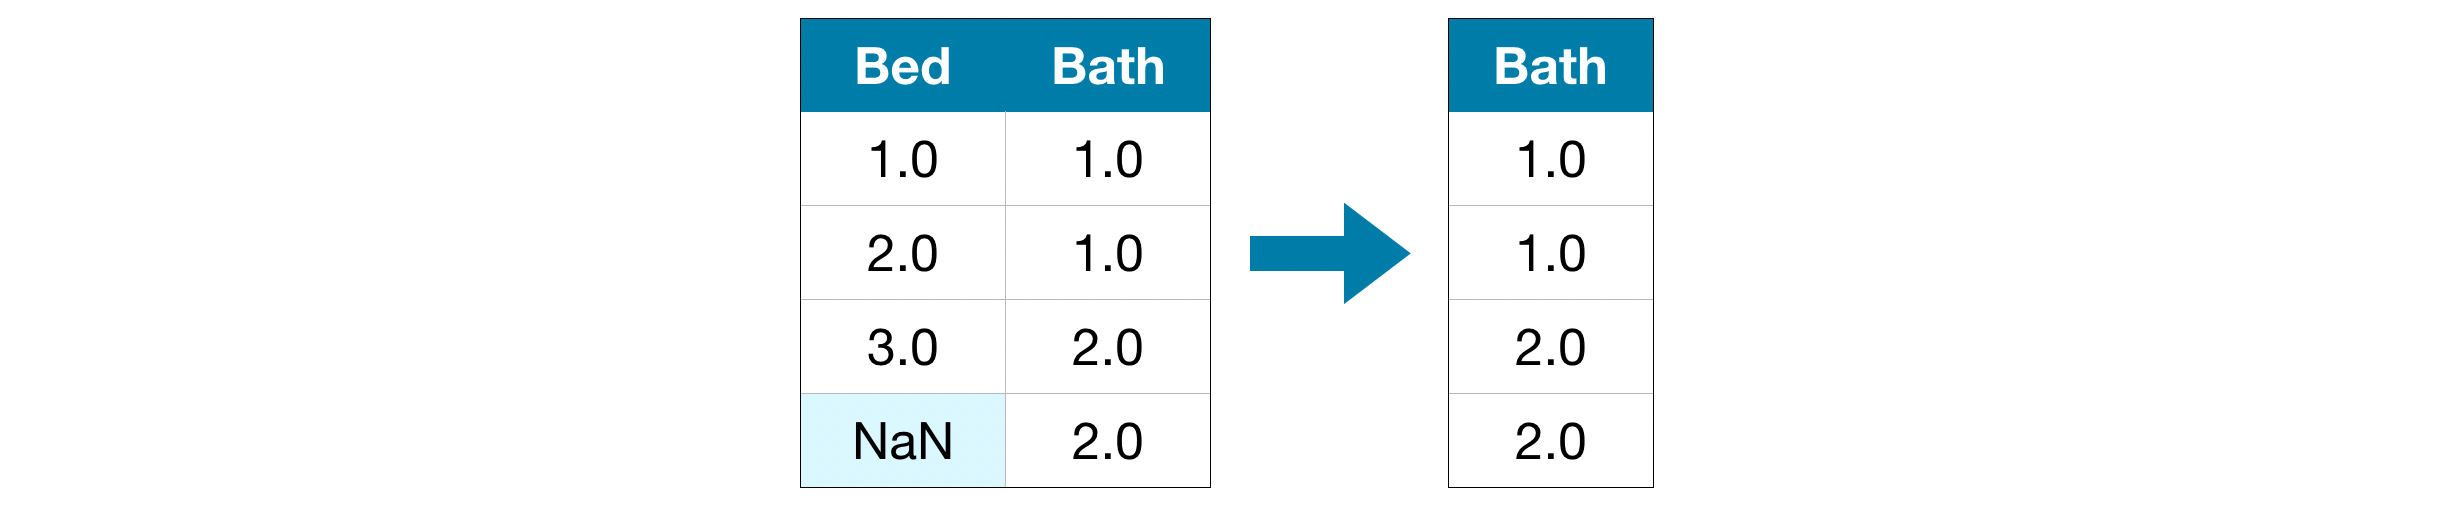

A meno che la maggior parte dei valori nelle colonne eliminate non siano mancanti, con questo approccio il modello perde l'accesso a molte informazioni (potenzialmente utili!). Come esempio estremo, si consideri un set di dati con 10.000 righe, in cui una colonna importante manca di una sola voce. Con questo approccio la colonna verrebbe eliminata del tutto!

2. **Imputazione**   
L'imputazione riempie i valori mancanti con un numero. Ad esempio, possiamo inserire il valore medio di ogni colonna.

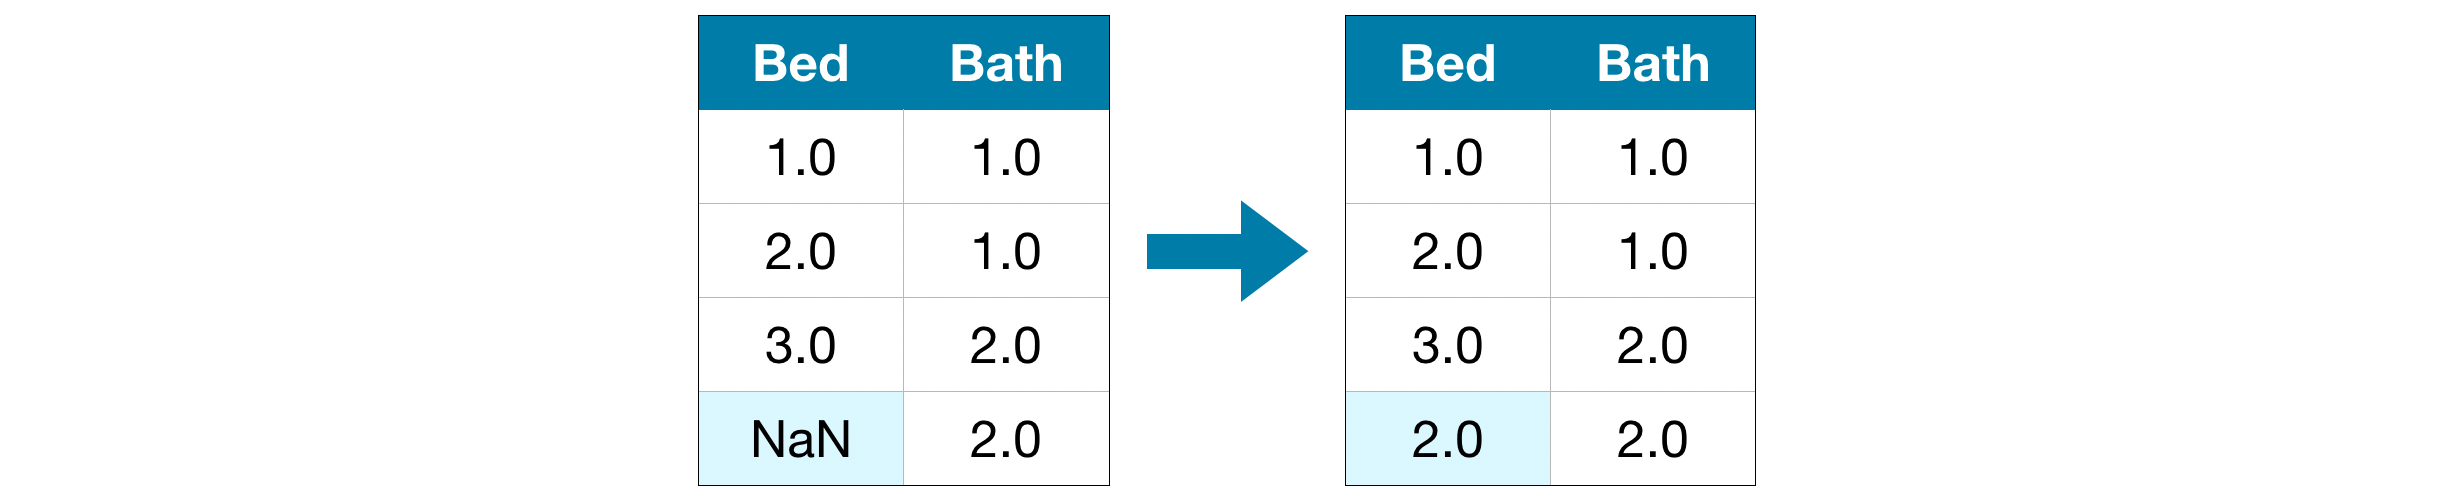

Il valore imputato non sarà esattamente corretto nella maggior parte dei casi, ma di solito porta a modelli più accurati di quelli che si otterrebbero eliminando completamente la colonna.

3. **Un'estensione dell'imputazione**  
L'imputazione è l'approccio standard e di solito funziona bene. Tuttavia, i valori imputati possono essere sistematicamente superiori o inferiori ai valori reali (che non sono stati raccolti nel dataset). Oppure le righe con valori mancanti possono essere uniche in qualche altro modo. In questo caso, il modello potrebbe fare previsioni migliori considerando quali valori erano originariamente mancanti.

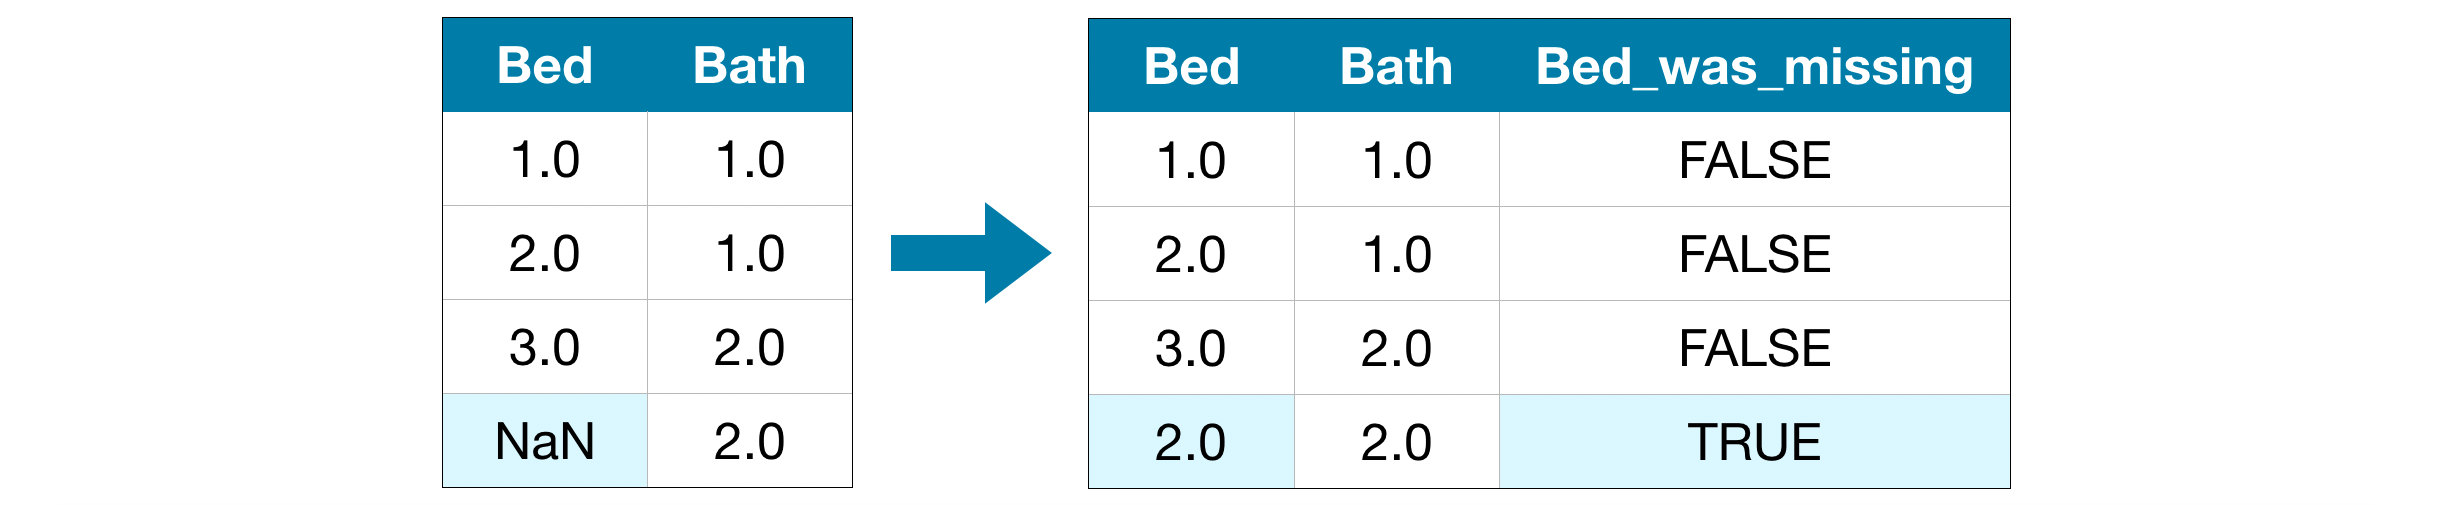

In questo approccio, imputiamo i valori mancanti, come in precedenza. Inoltre, per ogni colonna con voci mancanti nel set di dati originale, aggiungiamo una nuova colonna che mostra la posizione delle voci imputate.

In alcuni casi, questo migliora significativamente i risultati. In altri casi, non è affatto utile.

### Esempio
Nell'esempio, lavoreremo con il dataset Melbourne Housing. Il nostro modello utilizzerà informazioni come il numero di stanze e le dimensioni del terreno per prevedere il prezzo della casa.

Non ci concentreremo sulla fase di caricamento dei dati. Si può invece immaginare di trovarsi a un punto in cui si hanno già i dati di addestramento e di validazione in `X_train`, `X_valid`, `y_train` e `y_valid`.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('D:/Users/Alessio/OneDrive/Python/Kaggle/Intermediate Machine Learning/melb_data.csv')

# Select target
y = data.Price

# To keep things simple, we'll use only numerical predictors
melb_predictors = data.drop(['Price'], axis=1)
X = melb_predictors.select_dtypes(exclude=['object'])

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

#### Definire una funzione per misurare la qualità di ciascun approccio
Abbiamo definito una funzione `score_dataset()` per confrontare i diversi approcci alla gestione dei valori mancanti. Questa funzione riporta l'errore assoluto medio (MAE) di un modello a foresta casuale.

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

#### Punteggio dell'Approccio 1 (Eliminare le colonne con valori mancanti)
Poiché stiamo lavorando con entrambi gli insiemi di allenamento e di validazione, facciamo attenzione a eliminare le stesse colonne in entrambi i DataFrames.

In [15]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop columns with missing values):
183550.22137772635


#### Punteggio dell'approccio 2 (imputazione)
Successivamente, utilizziamo SimpleImputer per sostituire i valori mancanti con il valore medio di ogni colonna.

Sebbene sia semplice, il riempimento del valore medio in genere funziona abbastanza bene (ma questo varia a seconda del set di dati). Sebbene gli statistici abbiano sperimentato metodi più complessi per determinare i valori imputati (come l'imputazione per regressione, ad esempio), le strategie complesse in genere non danno alcun beneficio aggiuntivo una volta inseriti i risultati in modelli di apprendimento automatico sofisticati.

In [16]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE from Approach 2 (Imputation):
178166.46269899711


Si nota che l'approccio 2 ha un MAE inferiore a quello dell'approccio 1, quindi l'approccio 2 si è comportato meglio su questo set di dati.

#### Punteggio dell'approccio 3 (un'estensione dell'imputazione)
Successivamente, imputiamo i valori mancanti, tenendo anche traccia di quali valori sono stati imputati.

In [17]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

MAE from Approach 3 (An Extension to Imputation):
178927.503183954


Come si può notare, l'approccio 3 ha ottenuto risultati leggermente peggiori rispetto all'approccio 2.

Perché l'imputazione ha dato risultati migliori rispetto all'eliminazione delle colonne?
I dati di allenamento hanno 10864 righe e 12 colonne, dove tre colonne contengono dati mancanti. Per ogni colonna, meno della metà delle voci è mancante. Pertanto, l'eliminazione delle colonne rimuove molte informazioni utili e quindi è logico che l'imputazione ottenga risultati migliori.

In [18]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(10864, 12)
Car               49
BuildingArea    5156
YearBuilt       4307
dtype: int64


Come di consueto, l'imputazione dei valori mancanti (nell'Approccio 2 e nell'Approccio 3) ha prodotto risultati migliori rispetto a quelli ottenuti eliminando semplicemente le colonne con valori mancanti (nell'Approccio 1).

### Esercizi

In [19]:
# Set up code checking
import os
if not os.path.exists("D:/Users/Alessio/OneDrive/Python/Kaggle/Intermediate Machine Learning/train.csv"):
    os.symlink("D:/Users/Alessio/OneDrive/Python/Kaggle/Intermediate Machine Learning/train.csv")  
    os.symlink("D:/Users/Alessio/OneDrive/Python/Kaggle/Intermediate Machine Learning/test.csv")  
from learntools.core import binder
binder.bind(globals())
from learntools.ml_intermediate.ex2 import *
print("Setup Complete")

Setup Complete


Eseguire la cella di codice successiva senza modifiche per caricare gli insiemi di addestramento e validazione in `X_train`, `X_valid`, `y_train` e `y_valid`.  L'insieme di test viene caricato in `X_test`.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv("D:/Users/Alessio/OneDrive/Python/Kaggle/Intermediate Machine Learning/train.csv", index_col='Id')
X_test_full = pd.read_csv("D:/Users/Alessio/OneDrive/Python/Kaggle/Intermediate Machine Learning/test.csv", index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll use only numerical predictors
X = X_full.select_dtypes(exclude=['object'])
X_test = X_test_full.select_dtypes(exclude=['object'])

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

Utilizzare la cella di codice successiva per stampare le prime cinque righe dei dati.

In [22]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,20,90.0,11694,9,5,2007,2007,452.0,48,0,...,774,0,108,0,0,260,0,0,7,2007
871,20,60.0,6600,5,5,1962,1962,0.0,0,0,...,308,0,0,0,0,0,0,0,8,2009
93,30,80.0,13360,5,7,1921,2006,0.0,713,0,...,432,0,0,44,0,0,0,0,8,2009
818,20,NaN,13265,8,5,2002,2002,148.0,1218,0,...,857,150,59,0,0,0,0,0,7,2008
303,20,118.0,13704,7,5,2001,2002,150.0,0,0,...,843,468,81,0,0,0,0,0,1,2006


### Domanda 1
**Indagine preliminare**   
Eseguire la cella di codice sottostante senza modifiche.

In [23]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(1168, 36)
LotFrontage    212
MasVnrArea       6
GarageYrBlt     58
dtype: int64


Utilizzate l'output di cui sopra per rispondere alle domande seguenti.

In [24]:
# How many rows are in the training data?
num_rows = 1168

# How many columns in the training data have missing values?
num_cols_with_missing = 3

# How many missing entries are contained in all of the training data?
tot_missing = 212 + 6 + 58

# Check your answers
step_1.a.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

Considerando le risposte precedenti, quale pensate sia l'approccio migliore per gestire i valori mancanti?

Poiché le voci mancanti nei dati sono relativamente poche (la colonna con la più alta percentuale di valori mancanti è mancante di meno del 20% delle voci), è improbabile che l'eliminazione delle colonne produca buoni risultati. Questo perché si butterebbero via molti dati preziosi, e quindi l'imputazione probabilmente darà risultati migliori.

Per confrontare i diversi approcci alla gestione dei valori mancanti, si utilizzerà la stessa funzione `score_dataset()` del tutorial. Questa funzione riporta l'errore assoluto medio (MAE) di un modello random forest.

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

### Domanda 2
**Eliminare le colonne con valori mancanti**

In questo passo, si preprocesseranno i dati in `X_train` e `X_valid` per rimuovere le colonne con valori mancanti.  Impostare i DataFrames pre-elaborati rispettivamente su `reduced_X_train` e `reduced_X_valid`.  # Passo 2: Eliminare le colonne con valori mancanti

In questo passo, si preprocesseranno i dati in `X_train` e `X_valid` per rimuovere le colonne con valori mancanti.  Impostare i DataFrames pre-elaborati rispettivamente su `reduced_X_train` e `reduced_X_valid`.  

In [26]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

# Check your answers
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [27]:
print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE (Drop columns with missing values):
17837.82570776256


# Domanda 3
**Imputazione**

Utilizzare la cella di codice successiva per imputare i valori mancanti con il valore medio di ogni colonna.  Impostare i DataFrames preprocessati su `imputed_X_train` e `imputed_X_valid`.  Assicurarsi che i nomi delle colonne corrispondano a quelli di `X_train` e `X_valid`.

In [28]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

# Check your answers
step_3.a.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [29]:
print("MAE (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE (Imputation):
18062.894611872147


Confrontate i MAE di ciascun approccio. C'è qualcosa che vi sorprende nei risultati? Perché pensate che un approccio abbia funzionato meglio dell'altro?

Dato che i valori mancanti nel set di dati sono così pochi, ci aspetteremmo che l'imputazione sia migliore dell'eliminazione totale delle colonne. Tuttavia, vediamo che l'eliminazione delle colonne è leggermente migliore! Sebbene ciò possa essere in parte attribuito al rumore presente nel set di dati, un'altra potenziale spiegazione è che il metodo di imputazione non si adatta bene a questo set di dati. Forse, invece di riempire il valore medio, ha più senso impostare ogni valore mancante su un valore pari a 0, riempire il valore più frequentemente incontrato o usare qualche altro metodo. Ad esempio, si consideri la colonna GarageYrBlt (che indica l'anno di costruzione del garage). È probabile che in alcuni casi un valore mancante possa indicare una casa priva di garage. In questo caso, ha più senso inserire il valore mediano in ogni colonna? Oppure potremmo ottenere risultati migliori inserendo il valore minimo in ogni colonna? Non è chiaro cosa sia meglio in questo caso, ma forse possiamo escludere subito alcune opzioni: per esempio, impostare i valori mancanti in questa colonna a 0 potrebbe dare risultati orribili!

### Domanda 4
**Generare previsioni di prova**

In questa fase finale, si può utilizzare un approccio a scelta per gestire i valori mancanti. Una volta preelaborate le caratteristiche di addestramento e di convalida, si addestrerà e si valuterà un modello a foresta casuale.  Quindi, preelaborerete i dati di test prima di generare previsioni da sottoporre alla competizione!

Utilizzate la prossima cella di codice per preelaborare i dati di addestramento e di convalida.  Impostare i DataFrames preprocessati su `final_X_train` e `final_X_valid`.  **Per far sì che questo passaggio venga contrassegnato come corretto, è sufficiente assicurarsi che:
- i DataFrames preelaborati abbiano lo stesso numero di colonne,
- i DataFrames preelaborati non abbiano valori mancanti, 
- `final_X_train` e `y_train` abbiano lo stesso numero di righe e
- `final_X_valid` e `y_valid` hanno lo stesso numero di righe.

In [30]:
# Imputation
final_imputer = SimpleImputer(strategy='median')
final_X_train = pd.DataFrame(final_imputer.fit_transform(X_train))
final_X_valid = pd.DataFrame(final_imputer.transform(X_valid))

# Imputation removed column names; put them back
final_X_train.columns = X_train.columns
final_X_valid.columns = X_valid.columns

# Check your answers
step_4.a.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

Eseguire la prossima cella di codice per addestrare e valutare un modello di foresta casuale. (Si noti che non usiamo la funzione `score_dataset()`, perché presto useremo il modello addestrato per generare previsioni di test).

In [31]:
# Define and fit model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(final_X_train, y_train)

# Get validation predictions and MAE
preds_valid = model.predict(final_X_valid)
print("MAE (Your approach):")
print(mean_absolute_error(y_valid, preds_valid))

MAE (Your approach):
17791.59899543379


Utilizzare la cella di codice successiva per preelaborare i dati di test.  Assicurarsi di utilizzare un metodo che sia in accordo con il modo in cui sono stati preprocessati i dati di addestramento e di validazione e impostare le caratteristiche del test preprocessato su `final_X_test`.

Quindi, utilizzare le caratteristiche di test preelaborate e il modello addestrato per generare previsioni di test in `preds_test`.

Affinché questo passaggio sia contrassegnato come corretto, è sufficiente assicurarsi che:
- il DataFrame di test preelaborato non abbia valori mancanti e
- `final_X_test` abbia lo stesso numero di righe di `X_test`.

In [32]:
# Preprocess test data
final_X_test = pd.DataFrame(final_imputer.transform(X_test))

# Get test predictions
preds_test = model.predict(final_X_test)

# Check your answers
step_4.b.check()

E:\Users\Alessio\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

Eseguire la cella di codice successiva senza modifiche per salvare i risultati in un file CSV da inviare direttamente al concorso.

In [33]:
# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)